In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/kaggle/input/question-pairs-dataset/questions.csv")
df.shape

(404351, 6)

In [6]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [8]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
149104,149104,294979,294980,I am a software testing professional having 8....,I earn 8.0 LPA and working as Software Enginee...,0
217742,217742,429318,429319,What are some of the weirdest dreams you've ev...,What are the creepiest dreams you ever had?,1
122312,122312,242375,242376,What are the difference between the US and Chi...,What is the difference between Chinese educati...,1
154287,154287,305152,305153,Why does Peter Thiel support Ted Cruz?,Why would millennials support Ted Cruz?,0
333603,333603,654121,654122,Is astrology a form of energy?,Is numerology a form of energy?,0
322546,322546,632737,187389,How can I make a PHP session expire upon brows...,What is the best way to detect a close browser...,0
346052,346052,678128,678129,Why are my questions always flagged as needing...,Why are some questions on Quora flagged as nee...,1
360745,360745,706330,706331,What will be the effect of possible war betwee...,How does our economy effect if war happens bet...,1
319315,319315,626505,626506,What are some of the best books to prepare for...,"What is the best way, and the best book, for s...",0
390221,390221,762772,762773,How can I install OSX as a virtual machine in ...,Can you install Linux onto a Mac running osx 1...,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [10]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [11]:
df.duplicated().sum()

0

is_duplicate
0    255045
1    149306
Name: count, dtype: int64
is_duplicate
0    63.07515
1    36.92485
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

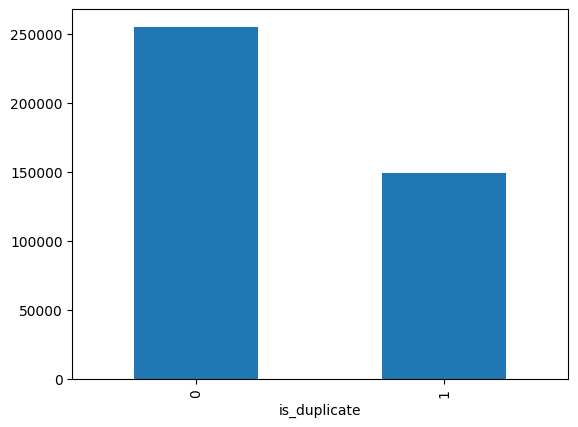

In [13]:
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [17]:
###repeated no of questions
qid = pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
print ("No of unique questions: ",np.unique(qid).shape[0])
x = qid.value_counts()>1
print ("No of repeated questions: ",x[x].shape[0])

No of unique questions:  789801
No of repeated questions:  13698


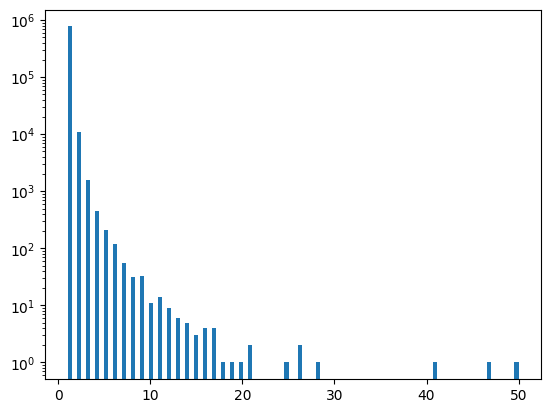

In [19]:
plt.hist(qid.value_counts().values,bins=100)
plt.yscale('log')
plt.show()

In [20]:
new_df = df.sample(30000)

In [21]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [23]:
new_df.duplicated().sum()

0

In [24]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
33259,How do I remove sunken eyes/hollow eyes natura...,What's the physiological cause for sunken eyes?
94426,Can I do masters in genetics after completing ...,Can we do MSC in human genetics after BSC in B...
38063,Does Rashi prediction really work?,Do astrology really work?
331260,Why should we be kind?,Why should people be kind?
162240,Should I start smoking?,What are some good reasons to start or continu...


In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [40]:
#merge qustions
questions = list(ques_df['question1'])+list(ques_df['question2'])
cv = CountVectorizer(max_features=3000)
q1_arr,q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [41]:
temp_df1 = pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr,index=ques_df.index)
temp_df = pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(30000, 6000)

In [44]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
33259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
38063,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
331260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
162240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127085,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
130909,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
148005,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
396933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(temp_df.iloc[:,0:-1].values, temp_df.iloc[:,-1].values, test_size = 0.2 , random_state=1 )

In [46]:
####using random forest algorithm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.7478333333333333